# Steps to Perform Linear Regression

1. **Load the Dataset**  
   Import and load the dataset into your working environment.

2. **Train-Test Split**  
   Divide the dataset into training and testing sets to evaluate the model’s performance.

3. **Standardize the Data**  
   Standardize the independent variables to ensure they are on the same scale.

   **Why Standardize the Data?**  
   - If the values of features (X) are much higher, it can lead to a high cost function, which is directly related to gradient descent.  
   - Standardization helps reduce the cost function, ensuring efficient convergence.  
   - Standardizing is especially important for distance-based and optimization-based algorithms.  

   The Z-score formula is applied to both `X_train` and `X_test` to normalize the data.  


In [1]:
import pandas as pd 
import numpy as np

In [7]:
df = pd.read_csv('/Users/ripeshghimire/coding/Intro_with_AI_ML/dataset/economic_index.csv')

In [11]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [9]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


Divide the dataset into train test split 

In [13]:
X = df.iloc[:,:-1]
X.head()

,year,month,interest_rate,unemployment_rate
0,2017,12,2.75,5.3
1,2017,11,2.50,5.3
2,2017,10,2.50,5.3
3,2017,9,2.50,5.3
4,2017,8,2.50,5.4


In [14]:
y = df.iloc[:,-1]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=90)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

1552.7830644153828
27.12703999661771
39.405368472016384


In [26]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(f"the score is {score}")

the score is 0.9582253920604946


In [27]:
residuals = y_test-y_pred

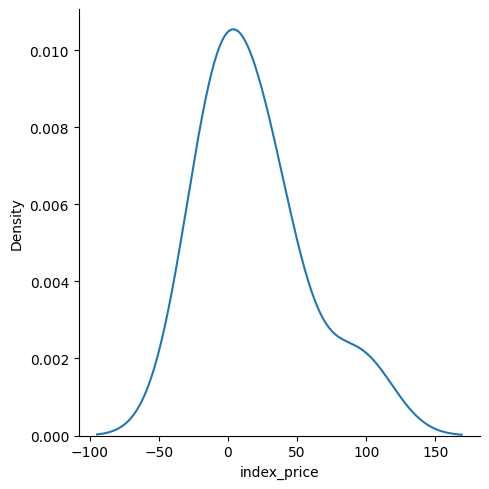

In [28]:
import seaborn as sns 
sns.displot(residuals,kind='kde')

In [1]:
class LinearRegression:
    def __init__(self,learning_rate=0.0001,n_iter=100):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None 
        self.bias = None  
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self. bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred